In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("calories.csv")

In [4]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df2 = pd.read_csv("exercise.csv")

In [6]:
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
df = pd.concat([df2,df1['Calories']],axis=1)

In [10]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Gender
female    7553
male      7447
Name: count, dtype: int64


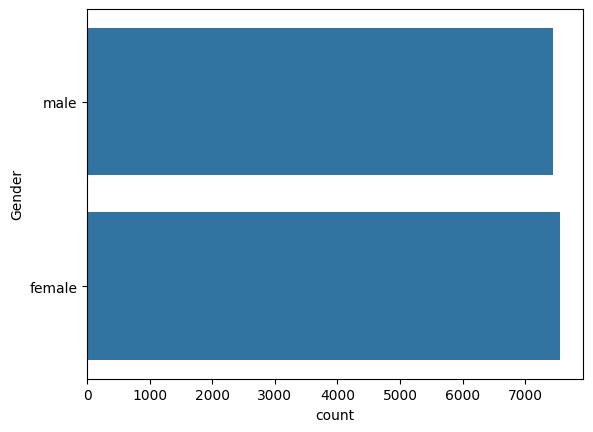

In [21]:
print(df['Gender'].value_counts())
sns.countplot(df["Gender"])
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


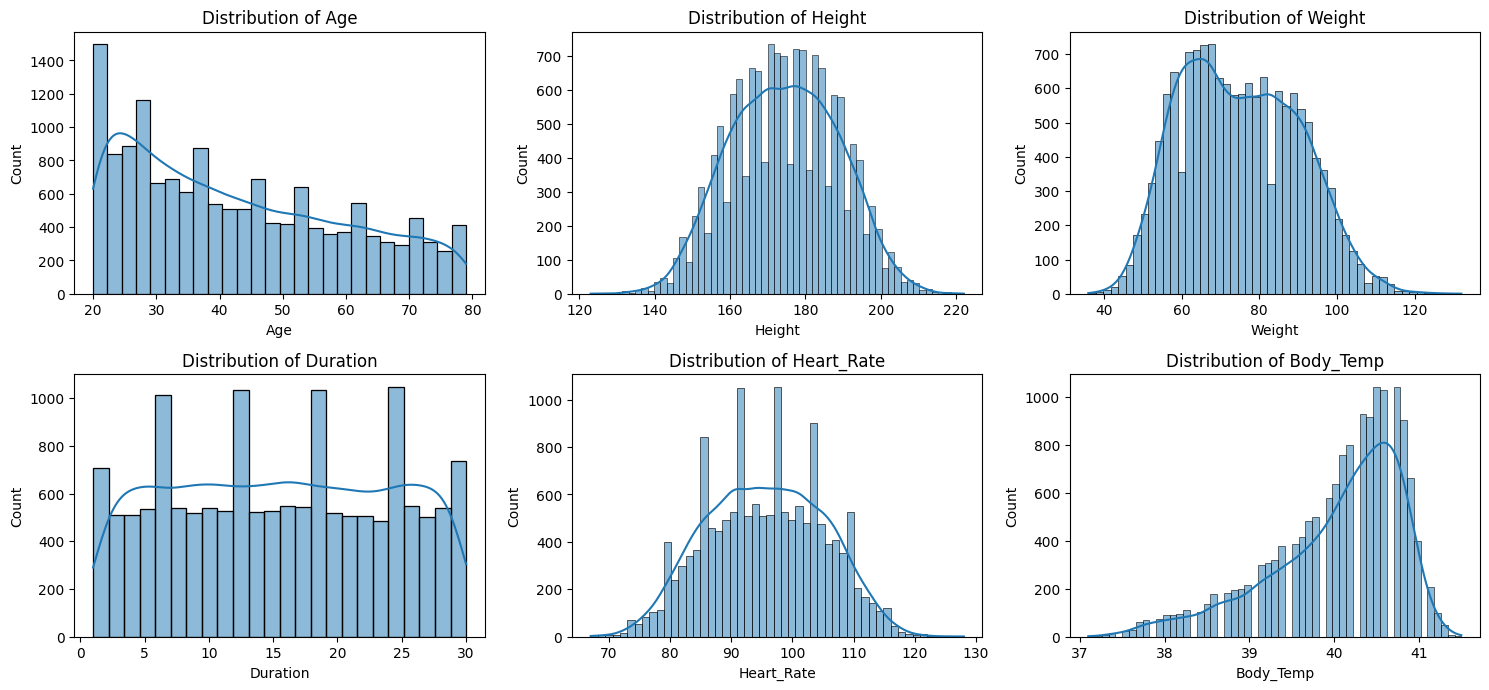

In [24]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Age','Height','Weight','Duration', 'Heart_Rate','Body_Temp'],1):
  plt.subplot(3, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder
Or = OrdinalEncoder()
df["Gender"]=Or.fit_transform(df[["Gender"]])

In [28]:
df["Gender"].value_counts()

Gender
0.0    7553
1.0    7447
Name: count, dtype: int64

<Axes: >

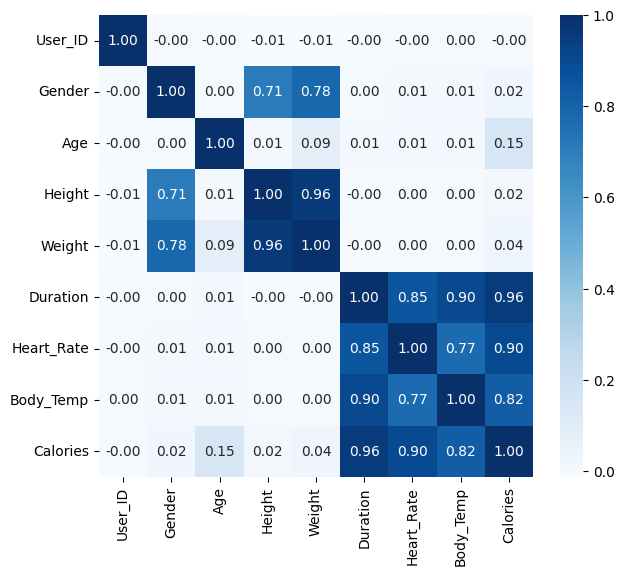

In [31]:
correlation=df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlation,annot=True,fmt=".2f",cmap="Blues")

In [32]:
X = df.drop(columns=['User_ID','Calories'], axis=1)
y =df['Calories']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [36]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
print( xgb.fit(X_train, y_train) )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:
train_pred=xgb.predict(X_train)
train_r2=r2_score(train_pred,y_train)
train_r2

0.9995692990241353

In [39]:
test_pred=xgb.predict(X_test)
test_r2=r2_score(test_pred,y_test)
test_r2

0.9987986496259049

In [41]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [44]:
df.sample()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
12121,12785594,0.0,21,170.0,67.0,17.0,95.0,40.0,80.0


In [47]:
# Sample input data
input_data = ('female',21,170.0,67.0,17.0,95.0,40.0)

# Create DataFrame
input_df = pd.DataFrame([input_data], columns=[ 'Gender', 'Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp'])

# Step 1: Ordinal Encoding
input_df["Gender"]= Or.transform(input_df[["Gender"]])

# Step 2: Make prediction
prediction = xgb.predict(input_df)

# Step 4: Print result
print("Prediction result:", prediction[0] )

Prediction result: 80.780655


In [48]:
import pickle
# Save model
with open("xgb_model.pkl", "wb") as model_file:
    pickle.dump(xgb, model_file)

# Save encoder
with open("ordinal_encoder.pkl", "wb") as encoder_file:
    pickle.dump(Or, encoder_file)
